In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [241]:
## Cleaning wrong data type

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [11]:
df['TotalCharges'].skew()

0.961642499724251

In [12]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [243]:
## Highly imbalanced data

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [245]:
## dropping customer id 

In [30]:
df.drop('customerID',axis=1, inplace=True)

In [247]:
## These are binary columns with just yes and no values so i have to replace them manually

In [32]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

C:\Users\HOME\AppData\Local\Temp\ipykernel_15444\162256719.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [249]:
## Lets check distribution of numeric cols

<Axes: xlabel='tenure', ylabel='Count'>

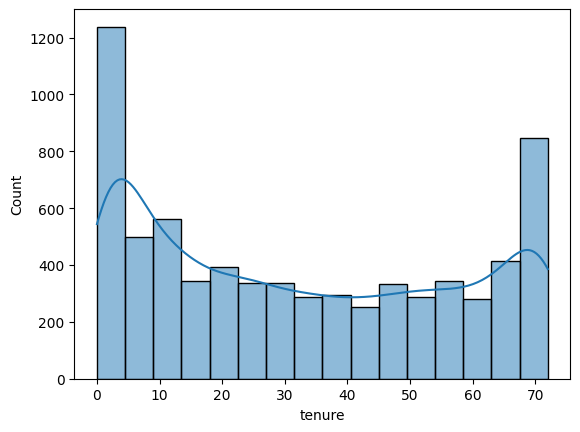

In [35]:
sns.histplot(df['tenure'], kde=True)

<Axes: xlabel='TotalCharges', ylabel='Count'>

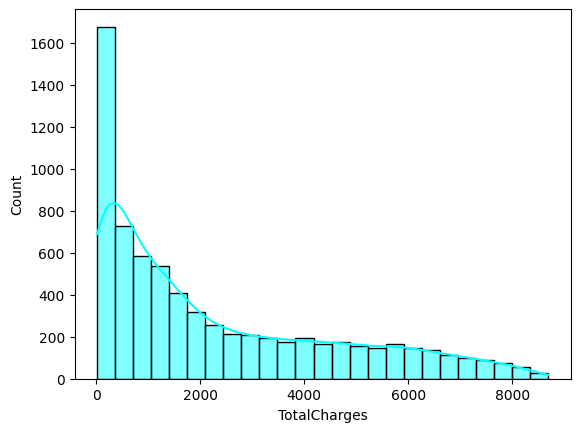

In [37]:
sns.histplot(df['TotalCharges'],kde=True, color='cyan')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

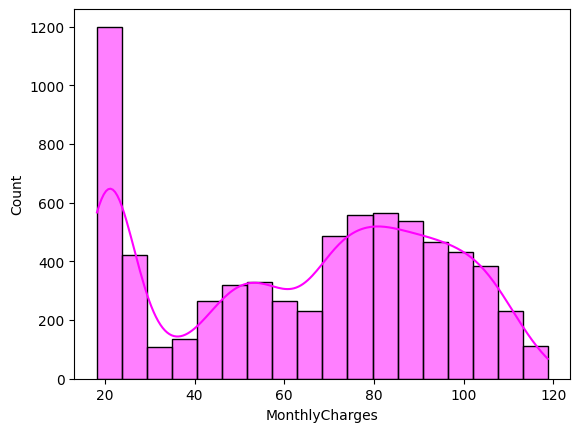

In [38]:
sns.histplot(df['MonthlyCharges'], kde=True, color='magenta')

In [251]:
## These are the columns with more the 2 unique categories so first of all lets clean and replace No, phone service with no

In [253]:
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    df[col] = df[col].replace({'No internet service': 'No'})
    
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

In [255]:
df[internet_service_cols + ['MultipleLines']] = df[internet_service_cols + ['MultipleLines']].replace({'Yes': 1, 'No': 0})

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as pl

In [48]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [257]:
### Create another feature here

In [49]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,29.850000
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,55.573529
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,54.075000
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,40.905556
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,75.825000


In [259]:
## Lets create pipeline and use RFC

In [51]:
binary_cols = ['gender','SeniorCitizen','Partner', 
               'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','AvgMonthlySpend']
onehot_cols = ['InternetService', 'Contract', 'PaymentMethod']
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, onehot_cols),
    ('bin', 'passthrough', binary_cols) 
])

model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=5))
])

# Train/test split
from sklearn.model_selection import train_test_split
for col in onehot_cols:
    df[col] = df[col].astype(str)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model_pipeline.fit(X_train, y_train)

print("Train Accuracy:", model_pipeline.score(X_train, y_train))
print("Test Accuracy:", model_pipeline.score(X_test, y_test))

Train Accuracy: 0.7587859424920128
Test Accuracy: 0.7473385379701917


In [261]:
## Better results but can be improved 

In [52]:
y_pred_rfc = model_pipeline.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [263]:
## Lets check feature imp

Text(0.5, 1.0, 'Feature Importance')

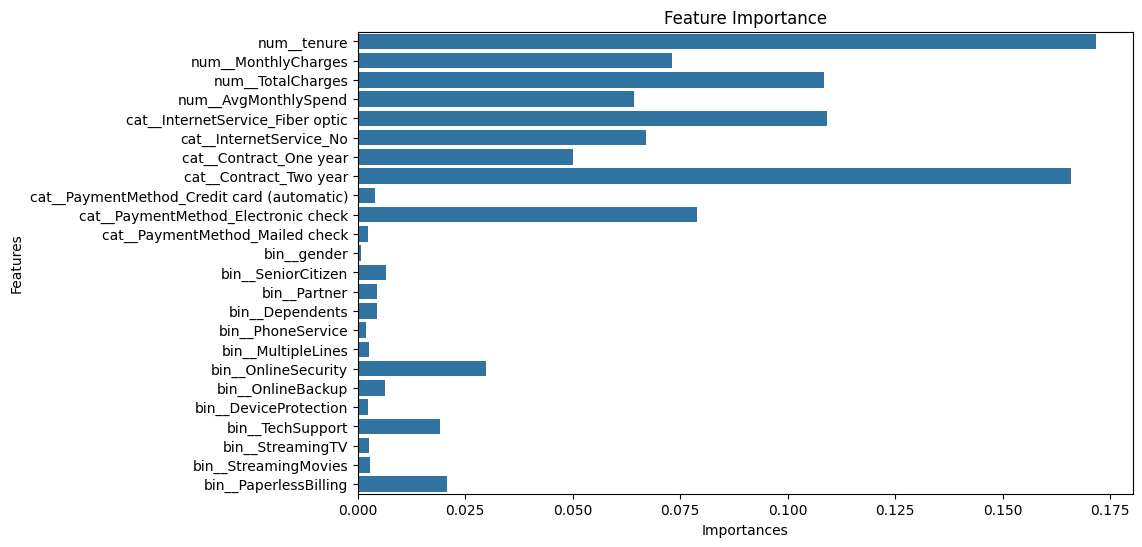

In [53]:
importances = model_pipeline['classifier'].feature_importances_
features = model_pipeline['preprocessing'].get_feature_names_out()
data = pd.DataFrame({
    "Features": features,
    "Importances": importances
})
plt.figure(figsize=(10,6))
sns.barplot(x=data['Importances'], y=data['Features'], errorbar=None)
plt.title("Feature Importance")

<Axes: xlabel='Churn'>

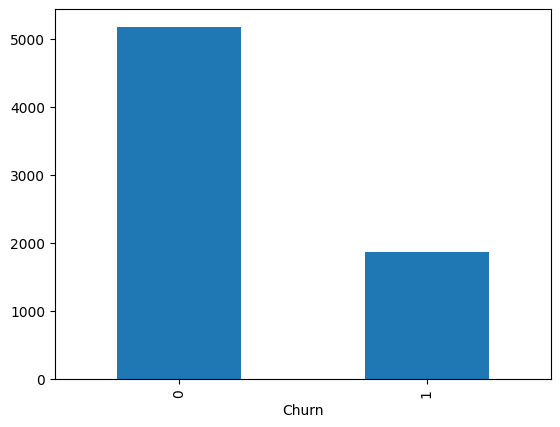

In [54]:
df['Churn'].value_counts().plot(kind='bar')

In [55]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

In [293]:
## Lets apply some more algorthems and check their performance

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True,random_state=42),
    "LOR": LogisticRegression(random_state=42, max_iter=1000),
    "DT": DecisionTreeClassifier(random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "XGB": XGBClassifier()
}

In [67]:
results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1_Score"])

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
def performance(model_name, y_test, y_pred):
    global results
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1_Score": [f1]
    })
    results = pd.concat([results, metrics], ignore_index=True)
    return results

In [71]:
names = []  

for name, model in models.items():
    model.fit(X_train_trans, y_train)
    y_pred = model.predict(X_test_trans)
    names.append(name)
    result_df = performance(name, y_test, y_pred)

print(names)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15444\1149082894.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, metrics], ignore_index=True)


['KNN', 'SVM', 'LOR', 'DT', 'GB', 'XGB']


In [299]:
## Logistic regression is performing very well overall

In [297]:
result_df.sort_values(ascending=False, by='F1_Score')

,Model,Accuracy,Precision,Recall,F1_Score
2,LOR,0.804116,0.654088,0.556150,0.601156
4,GB,0.801278,0.659864,0.518717,0.580838
5,XGB,0.781405,0.600000,0.529412,0.562500
0,KNN,0.767211,0.562162,0.556150,0.559140
1,SVM,0.794890,0.657993,0.473262,0.550544
3,DT,0.735983,0.502604,0.516043,0.509235


In [301]:
## Logistic reg results

In [87]:
lr = LogisticRegression(max_iter=1000,solver='saga', penalty='l1',C=1, class_weight=None).fit(X_train_trans, y_train)
y_lr = lr.predict(X_test_trans)
print(classification_report(y_test, y_lr))
print(confusion_matrix(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

[[923 112]
 [167 207]]


In [303]:
## Roc_Auc curve of lr

In [91]:
lr_prob = lr.predict_proba(X_test_trans)[:,1]
print(roc_auc_score(y_test, lr_prob))

0.8428711669120875


In [305]:
##lets tune it 

In [62]:
from sklearn.model_selection import GridSearchCV
params = {
    "penalty": ['l1', 'l2'],
    "C": [0.01, 0.05,0.1, 0.5,1],
    "class_weight" : ['balanced', None],
    "solver": ['saga']
}

In [64]:
grid = GridSearchCV(lr, param_grid=params, cv=10, scoring='accuracy', verbose=1, n_jobs=-1).fit(X_train_trans, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.8040395928599322


In [309]:
## lets use XGBoost classifier

In [66]:
binary_cols = ['gender','SeniorCitizen','Partner', 
               'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','AvgMonthlySpend']
onehot_cols = ['InternetService', 'Contract', 'PaymentMethod']
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, onehot_cols),
    ('bin', 'passthrough', binary_cols) 
])

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier())
])

# Train/test split
from sklearn.model_selection import train_test_split
for col in onehot_cols:
    df[col] = df[col].astype(str)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [67]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AvgMonthlySpend']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknow...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [311]:
## Better but still low

In [68]:
y_xgb = model.predict(X_test)
print(classification_report(y_test, y_xgb))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[903 132]
 [176 198]]


In [313]:
## Lets tune it to get some better results

In [69]:
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),  # for imbalance
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params, random_state=42)

    # Stratified CV
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(model, X_train_trans, y_train, cv=skf, scoring=make_scorer(f1_score)).mean()

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, show_progress_bar=True)

In [ ]:
df.head()

In [78]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [82]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [315]:
## Apply smote to check may it give better result

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=12)
X_res, y_res = smote.fit_resample(X_train,y_train)

In [317]:
## Lets use voting cls to get some better results

In [90]:
from sklearn.ensemble import VotingClassifier

In [319]:
## engineered some features but drop due to no increase in performance

In [421]:
params = {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
est = [("lr",LogisticRegression(max_iter=1000,solver='saga', penalty='l1',C=1, class_weight=None)
),("gb", GradientBoostingClassifier(random_state=42)),('ada', AdaBoostClassifier(random_state=42))]

In [397]:
## Complete pipeline with voting

In [399]:
binary_cols = ['gender','SeniorCitizen','Partner', 
               'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','AvgMonthlySpend']
onehot_cols = ['InternetService', 'Contract', 'PaymentMethod']
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, onehot_cols),
    ('bin', 'passthrough', binary_cols) 
])

final_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', VotingClassifier(estimators=est, voting='soft',weights=[1,2,2]))
])

# Train/test split
from sklearn.model_selection import train_test_split
for col in onehot_cols:
    df[col] = df[col].astype(str)
X = df.drop(columns=['Churn','ChurnRiskScore','ChurnRiskLevel','ChurnRiskScoreBin'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [403]:
final_model.fit(X_train, y_train)
y_voting = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
y_probs = final_model.predict_proba(X_test)[:, 1]

# Try different thresholds
threshold = 0.40
y_pred_thresh = (y_probs >= threshold).astype(int)

# Recalculate precision, recall, f1
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))
print(confusion_matrix(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

[[903 132]
 [176 198]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.70      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.78      0.79      1409

[[836 199]
 [112 262]]


In [405]:
final_model.named_steps['preprocessing'].get_feature_names_out()

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'num__AvgMonthlySpend', 'cat__InternetService_Fiber optic',
       'cat__InternetService_No', 'cat__Contract_One year',
       'cat__Contract_Two year',
       'cat__PaymentMethod_Credit card (automatic)',
       'cat__PaymentMethod_Electronic check',
       'cat__PaymentMethod_Mailed check', 'bin__gender',
       'bin__SeniorCitizen', 'bin__Partner', 'bin__Dependents',
       'bin__PhoneService', 'bin__MultipleLines', 'bin__OnlineSecurity',
       'bin__OnlineBackup', 'bin__DeviceProtection', 'bin__TechSupport',
       'bin__StreamingTV', 'bin__StreamingMovies',
       'bin__PaperlessBilling'], dtype=object)

In [409]:
from sklearn.metrics import average_precision_score
average_precision_score(y_voting, y_probs)

1.0

In [411]:
roc_auc_score(y_voting, y_probs)

1.0

In [423]:
params = {'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
est = [("lr",LogisticRegression(max_iter=1000,solver='saga', penalty='l1',C=1, class_weight=None)
),("gb", GradientBoostingClassifier(random_state=42)),('ada', AdaBoostClassifier(random_state=42))]

In [425]:
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            v_ = VotingClassifier(estimators=est, voting='soft',weights=[w1,w2,w3]).fit(X_t, y_train)
            y_v = voting_cls.predict(X_te)
            print("current: ",w1, w2, w3)
            print(f1_score(y_test, y_v))

C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


current:  1 1 1
0.5887445887445888


C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


current:  1 1 2
0.5887445887445888


C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


current:  1 1 3
0.5887445887445888


C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


current:  1 2 1
0.5887445887445888


KeyboardInterrupt: 

In [437]:
print(final_model.named_steps['classifier'].estimators_)

[LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga'), GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42)]


In [193]:
import numpy as np
from sklearn.metrics import f1_score

best_thresh = 0.5
best_f1 = 0

for thresh in np.arange(0.3, 0.6, 0.01):
    preds = (y_proba >= thresh).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"🔍 Best Threshold: {best_thresh:.2f}, F1-score: {best_f1:.4f}")

🔍 Best Threshold: 0.30, F1-score: 0.6315


In [201]:
import joblib

In [203]:
joblib.dump(final_model,'voting_churn.pkl')

['voting_churn.pkl']

In [223]:
final_model.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'AvgMonthlySpend'], dtype=object)

C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


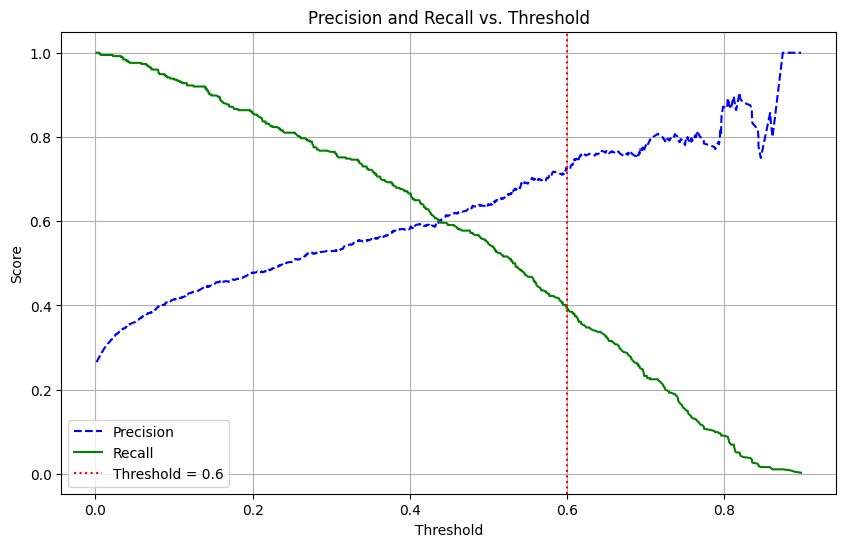

In [211]:
from sklearn.metrics import precision_recall_curve
y_scores = final_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.axvline(x=0.6, color='red', linestyle=':', label='Threshold = 0.6')
plt.title('Precision and Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [144]:
best_thresh = 0
best_f1 = 0

for thresh in thresholds:
    preds = (y_scores >= thresh).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"Best F1-score: {best_f1:.4f} at threshold: {best_thresh:.2f}")

Best F1-score: 0.6675 at threshold: 0.48


In [96]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import make_scorer, f1_score

def objective(trial):
    # RandomForest params
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 100, 1000, step=100)
    rf_max_depth = trial.suggest_int("rf_max_depth", 3, 20)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 10)
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 1, 5)
    rf_max_features = trial.suggest_categorical("rf_max_features", ["sqrt", "log2"])

    # GradientBoosting params
    gb_n_estimators = trial.suggest_int("gb_n_estimators", 100, 1000, step=100)
    gb_learning_rate = trial.suggest_float("gb_learning_rate", 0.01, 0.3)
    gb_max_depth = trial.suggest_int("gb_max_depth", 3, 15)
    gb_subsample = trial.suggest_float("gb_subsample", 0.5, 1.0)
    gb_min_samples_split = trial.suggest_int("gb_min_samples_split", 2, 10)
    gb_min_samples_leaf = trial.suggest_int("gb_min_samples_leaf", 1, 5)

    # Create models
    rf = RandomForestClassifier(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_split=rf_min_samples_split,
        min_samples_leaf=rf_min_samples_leaf,
        max_features=rf_max_features,
        class_weight='balanced',
        random_state=42
    )

    gb = GradientBoostingClassifier(
        n_estimators=gb_n_estimators,
        learning_rate=gb_learning_rate,
        max_depth=gb_max_depth,
        subsample=gb_subsample,
        min_samples_split=gb_min_samples_split,
        min_samples_leaf=gb_min_samples_leaf,
        random_state=42
    )

    # Voting ensemble
    ensemble = VotingClassifier(
        estimators=[('rf', rf), ('gb', gb)],
        voting='soft'
    )

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(ensemble, X_res, y_res, cv=cv,
                            scoring=make_scorer(f1_score)).mean()
    return score

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=1800)  # e.g., 30 minutes

# Best result
print("Best F1 Score:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-05-07 09:03:22,678] A new study created in memory with name: no-name-46ad8e54-61e8-4788-8d0f-579d7f47b3b9
[W 2025-05-07 09:03:33,134] Trial 0 failed with parameters: {'rf_n_estimators': 500, 'rf_max_depth': 19, 'rf_min_samples_split': 3, 'rf_min_samples_leaf': 5, 'rf_max_features': 'log2', 'gb_n_estimators': 400, 'gb_learning_rate': 0.13745337050473289, 'gb_max_depth': 15, 'gb_subsample': 0.8582378808745543, 'gb_min_samples_split': 8, 'gb_min_samples_leaf': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\HOME\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\HOME\AppData\Local\Temp\ipykernel_15968\1191732904.py", line 51, in objective
    score = cross_val_score(ensemble, X_res, y_res, cv=cv,
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HOME\anaconda3\Lib\site-packages\sklear

KeyboardInterrupt: 

In [371]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
models = {
    "gd": GradientBoostingClassifier(random_state=42),
    "ada": AdaBoostClassifier(random_state=42),
    "Extra": ExtraTreesClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "DT": DecisionTreeClassifier(random_state=42),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier(),
    "Cat": CatBoostClassifier(random_state=42),
    "NB": GaussianNB(),
    "MultiNB": MultinomialNB(),
    "BNB": BernoulliNB()
}

In [103]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'])

def metrics(model_name, y_test, y_pred):
    global results
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metric = pd.DataFrame([{
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "f1_score": f1
    }])
    
    results = pd.concat([results, metric], ignore_index=True)

In [104]:
for model_name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    metrics(model_name, y_test, y_pred)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15968\3204618587.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, metric], ignore_index=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4138, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 8276, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Learning rate set to 0.025401
0:	learn: 0.6789566	total: 173ms	remaining: 2m 52s
1:	learn: 0.6622730	total: 178ms	remaining: 1m 28s
2:	learn: 0.6490245	total: 183ms	remaining: 1m
3:	learn: 0.6272869	total: 188ms	remaining: 46.9s
4:	learn: 0.6134535	total: 194ms	remaining: 38.6s
5:	learn: 0.6027195	total: 198ms	remaining: 32.8s
6:	learn: 0.5937002	total: 202ms	remaining: 28.7s
7:	learn: 0.5845507	total: 206ms	remaining

In [107]:
results

,Model,Accuracy,Precision,Recall,f1_score
0,gd,0.787793,0.584091,0.689008,0.632226
1,ada,0.765082,0.539623,0.766756,0.633444
2,Extra,0.778566,0.587896,0.546917,0.566667
3,KNN,0.721789,0.482696,0.710456,0.574837
4,SVM,0.711143,0.469314,0.697051,0.560949
5,DT,0.729595,0.490099,0.530831,0.509653
6,XGB,0.784954,0.592105,0.603217,0.597610
7,LGBM,0.801278,0.625337,0.621984,0.623656
8,Cat,0.794180,0.606684,0.632708,0.619423
9,NB,0.757275,0.527828,0.788204,0.632258


In [237]:
m = joblib.load("voting_churn.pkl")

In [451]:
binary_cols = ['gender','SeniorCitizen','Partner', 
               'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','AvgMonthlySpend']
onehot_cols = ['InternetService', 'Contract', 'PaymentMethod']
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, onehot_cols),
    ('bin', 'passthrough', binary_cols) 
])

ada = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train/test split
from sklearn.model_selection import train_test_split
for col in onehot_cols:
    df[col] = df[col].astype(str)
X = df.drop(columns=['Churn','ChurnRiskScore','ChurnRiskLevel','ChurnRiskScoreBin'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [453]:
ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AvgMonthlySpend']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('bin', 'passthrough',
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [455]:
y_ada = ada.predict(X_test)
print(classification_report(y_test, y_ada))
print(confusion_matrix(y_test, y_ada))
y_probs = ada.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[935 100]
 [180 194]]


In [457]:
threshold = 0.40
y_thresh = (y_probs >= threshold).astype(int)

# Recalculate precision, recall, f1
print(classification_report(y_test, y_thresh))
print(confusion_matrix(y_test, y_thresh))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409

[[874 161]
 [143 231]]


In [459]:
roc_auc_score(y_test, y_probs)

0.8419992766540081

In [461]:
average_precision_score(y_test, y_probs)

0.6525201050428123

In [485]:
vvv = VotingClassifier(estimators=[("ada", AdaBoostClassifier(random_state=42)),("gb",GradientBoostingClassifier(random_state=42))],
                       voting='soft', weights=[1,5])
vvv.fit(X_t, y_train)

VotingClassifier(estimators=[('ada', AdaBoostClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft', weights=[1, 5])

In [486]:
y_vv = vvv.predict(X_te)
print(classification_report(y_test, y_vv))
print(confusion_matrix(y_test, y_vv))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[936  99]
 [179 195]]


In [497]:
prob = vvv.predict_proba(X_te)[:,1]

In [489]:
f1_score(y_test, y_vv)

0.5838323353293413

In [477]:
for w1 in range(1,6):
    for w2 in range(1,6):
        vv = VotingClassifier(estimators=[("ada", AdaBoostClassifier(random_state=42)),("gb",GradientBoostingClassifier(random_state=42))],
                              voting='soft', weights=[w1,w2])
        vv.fit(X_t, y_train)
        y_v = vv.predict(X_te)
        print("Current: ",w1,w2)
        print(f1_score(y_test, y_v))

Current:  1 1
0.5779122541603631
Current:  1 2
0.5783132530120482
Current:  1 3
0.5804511278195489
Current:  1 4
0.5817091454272864
Current:  1 5
0.5838323353293413
Current:  2 1
0.5809379727685325
Current:  2 2
0.5779122541603631
Current:  2 3
0.579185520361991
Current:  2 4
0.5783132530120482
Current:  2 5
0.5783132530120482
Current:  3 1
0.5822021116138764
Current:  3 2
0.5830815709969789
Current:  3 3
0.5779122541603631
Current:  3 4
0.5800604229607251
Current:  3 5
0.5783132530120482
Current:  4 1
0.5804511278195489
Current:  4 2
0.5809379727685325
Current:  4 3
0.5748865355521936
Current:  4 4
0.5779122541603631
Current:  4 5
0.5800604229607251
Current:  5 1
0.5727272727272728
Current:  5 2
0.5830815709969789
Current:  5 3
0.5830815709969789
Current:  5 4
0.5748865355521936
Current:  5 5
0.5779122541603631


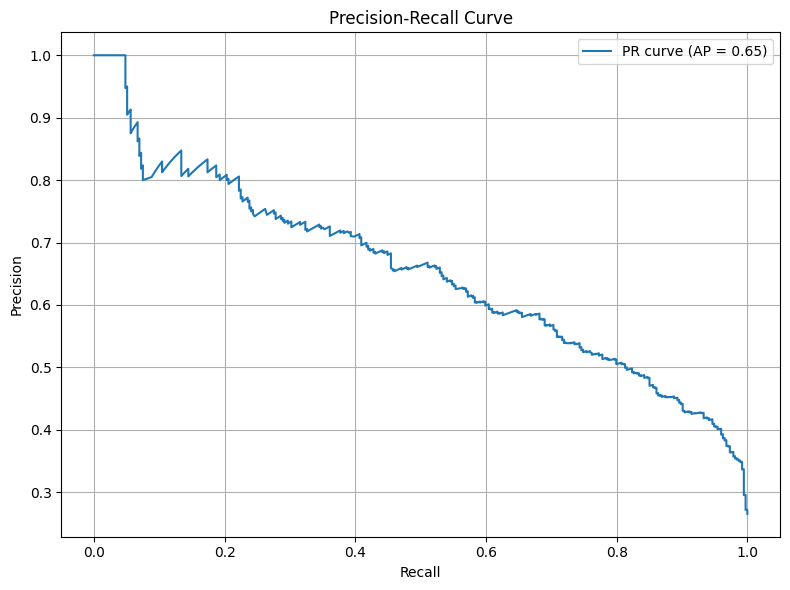

In [499]:
precision, recall, thresholds = precision_recall_curve(y_test,prob)
avg_precision = average_precision_score(y_test, prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()